In [1]:
import pandas as pd
import json
from transformers import AutoTokenizer

/home/cosmoquester/aibookathon/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../dataset-v2/dev.jsonl", sep="\x00", header=None)

df["data"] = df[0].apply(json.loads)
df["title"] = df["data"].apply(lambda data: data["title"])
df["content"] = df["data"].apply(lambda data: data["content"])
df = df[["title", "content"]].copy()

In [3]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/polyglot-ko-1.3b")

In [6]:
df["tokens"] = df["content"].apply(lambda text: tokenizer(text, return_attention_mask=False, return_token_type_ids=False, truncation=False)["input_ids"])

In [21]:
df["token_lengths"] = df["tokens"].apply(len)
df["char_lengths"] = df["content"].apply(len)

In [10]:
token_length_counts = df["token_lengths"].value_counts()

In [22]:
print("토큰 개수 평균:", df["token_lengths"].mean())
print("토큰 개수 중간값:", df["token_lengths"].median())
print("토큰 개수 표준편차:", df["token_lengths"].std())

토큰 개수 평균: 956.4428258924132
토큰 개수 중간값: 839.0
토큰 개수 표준편차: 774.3243166817458


In [23]:
print("글자 개수 평균:", df["char_lengths"].mean())
print("글자 개수 중간값:", df["char_lengths"].median())
print("글자 개수 표준편차:", df["char_lengths"].std())

글자 개수 평균: 1768.1240429551556
글자 개수 중간값: 1553.0
글자 개수 표준편차: 1439.7600623423116


In [46]:
for n in [1000, 5000, 10000, 20000]:
    n_rows_over_characters = df[df["char_lengths"]>n]["title"].count()
    print(f"{n:5} 글자 이상 문서: {n_rows_over_characters:5}개, {n_rows_over_characters / df.shape[0] * 100:8.4f}%")

 1000 글자 이상 문서: 13499개,  67.1125%
 5000 글자 이상 문서:   545개,   2.7096%
10000 글자 이상 문서:    40개,   0.1989%
20000 글자 이상 문서:     1개,   0.0050%


<AxesSubplot: >

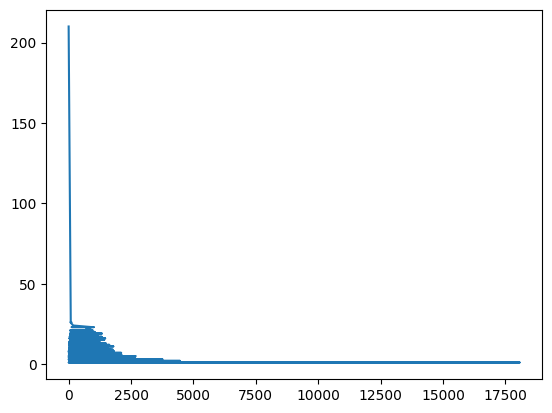

In [20]:
token_length_counts.plot()